In [2]:
import pandas as pd

# === Load each relevant dataset === #
account_dim = pd.read_csv(r"D:\sports analytics projects\datathon\datathon\data\account_dim_20250325.csv")
rams_batch = pd.read_csv(r"D:\sports analytics projects\datathon\datathon\data\rams_batch_cur_20250325.csv")
fraud_cases = pd.read_csv(r"D:\sports analytics projects\datathon\datathon\data\fraud_claim_case_20250325.csv")
fraud_trans = pd.read_csv(r"D:\sports analytics projects\datathon\datathon\data\fraud_claim_tran_20250325.csv")

In [3]:
account_dim["ebill_ind"].fillna(account_dim["ebill_ind"].mode()[0], inplace=True)
account_dim["employee_code"].fillna("UNKNOWN", inplace=True)
account_dim["special_finance_charge_ind"].fillna("N", inplace=True)
account_dim["ext_status_reason_cd_desc"].fillna("UNKNOWN", inplace=True)
account_dim["pscc_ind"].fillna(0, inplace=True)


In [4]:
rams_batch.rename(columns={"cu_account_nbr": "current_account_nbr"}, inplace=True)
fraud_cases.rename(columns={"cu_account_nbr": "current_account_nbr"}, inplace=True)
fraud_trans.rename(columns={"cu_account_nbr": "current_account_nbr"}, inplace=True)

In [5]:
merged = account_dim.merge(rams_batch, on="current_account_nbr", how="left")

In [6]:
fraud_case_flag = fraud_cases.groupby("current_account_nbr").size().reset_index(name="has_fraud_case")
fraud_tran_flag = fraud_trans.groupby("current_account_nbr").size().reset_index(name="has_fraud_tran")
merged = merged.merge(fraud_case_flag, on="current_account_nbr", how="left")
merged = merged.merge(fraud_tran_flag, on="current_account_nbr", how="left")

In [7]:
merged["has_fraud_case"] = merged["has_fraud_case"].fillna(0).astype(int)
merged["has_fraud_tran"] = merged["has_fraud_tran"].fillna(0).astype(int)
merged.head()

,current_account_nbr,client_id,open_date,card_activation_date,card_activation_flag,ebill_ind,date_in_collection,overlimit_type_flag,payment_hist_1_12_mths,payment_hist_13_24_mths,...,cu_processing_date,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths,has_fraud_case,has_fraud_tran
0,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17T00:00:00.000-04:00,NaN,8,E,NaN,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,...,2025-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17T00:00:00.000-04:00,NaN,8,E,NaN,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,...,2024-11-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17T00:00:00.000-04:00,NaN,8,E,NaN,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,...,2025-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17T00:00:00.000-04:00,NaN,8,E,NaN,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,...,2024-10-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17T00:00:00.000-04:00,NaN,8,E,NaN,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,...,2024-12-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [8]:
merged["card_never_activated"] = merged["card_activation_date"].isna().astype(int)
merged = merged.dropna(subset=["cu_crd_line"])

merged = merged.reset_index(drop=True)

merged["date_in_collection"] = merged["date_in_collection"].notna().astype(int)



<Axes: xlabel='cu_cash_line_am'>

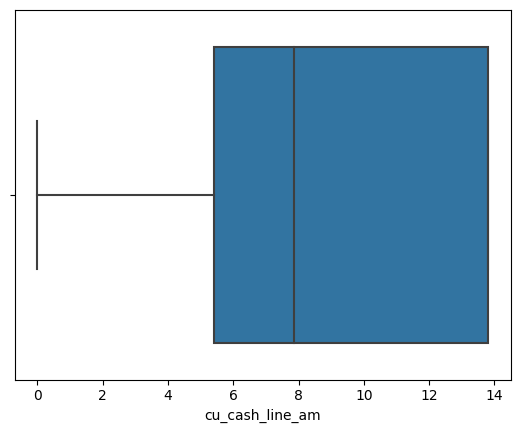

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
merged["cu_cash_line_am"] = merged["cu_cash_line_am"].clip(upper=1_000_000)
sns.boxplot(x=np.log1p(merged["cu_cash_line_am"]))

In [10]:
# Identify all categorical (object or string) columns
cat_cols = merged.select_dtypes(include=["object"]).columns.tolist()

# Display unique values for each to guide proper encoding
for col in cat_cols:
    print(f"\n{col}:")
    print(merged[col].dropna().unique())



current_account_nbr:
['nTgalbpd5Rsol7CA' 'xYaLrD9IvmbVl1PB' 'JM78WNziiRWgmL8e' ...
 'XiW0as5dJX6GJRi0' 'Xu1i4wqn776tFKU6' 'UU3UiLwIVVSikGPq']

client_id:
['YCTHAA278DC' 'CCSP489PLCC' 'HGBHARRFT984' 'OSELW263' 'ONEMV447COB'
 'ARPPYALC768' 'JTX290DC' 'AOHTME710DC' 'LKEB314DC' 'RTDECCI129DC'
 'LDJAUCP673' 'HNS962' 'CDVFQR626' 'YAUAPPLLDA934' 'SVRDCMSNAS887'
 'GOEOLG279' 'DGS176DC' 'OCAOAZNMN549' 'PJNOCC254' 'TJX513PLCC'
 'ZIONVRE794' 'CMSSSNAO606' 'BKLE911' 'ERWCJ164DC' 'LMEAAEG694DC'
 'RGALNW318DC' 'YEBA047COB' 'SEMEFLILLT443DC' 'DGS619PLCC' 'EORHVCN154DC'
 'ATBCLRAR077' 'RAEGLEMAEI254' 'BLARARTC432DC' 'WLCRPEJ828'
 'GRLNAW782PLCC' 'RTU038DC' 'WSLEO947DC' 'DUEAABLY384' 'LPPAAY817'
 'NCHSBPO661' 'NSH241DC' 'TEHAMO130' 'RNEDGIIVR336']

open_date:
['2020-07-17T00:00:00.000-04:00' '2024-07-24T00:00:00.000-04:00'
 '2024-05-05T00:00:00.000-04:00' ... '2018-02-27T00:00:00.000-05:00'
 '2018-08-14T00:00:00.000-04:00' '2025-03-19T00:00:00.000-04:00']

card_activation_date:
['2024-08-09T00:00:00.0

In [11]:
merged.isna().sum()

current_account_nbr                0
client_id                          0
open_date                          0
card_activation_date           14182
card_activation_flag               0
ebill_ind                          0
date_in_collection                 0
overlimit_type_flag                0
payment_hist_1_12_mths             0
payment_hist_13_24_mths            0
employee_code                      0
external_status_reason_code        0
special_finance_charge_ind         0
pscc_ind                           0
ext_status_reason_cd_desc          0
account_card_type                  0
cu_bhv_scr                         0
ca_cash_bal_pct_crd_line           0
ca_cash_bal_pct_cash_line          0
cu_nbr_days_dlq                    0
cu_nbr_of_plastics                 0
ca_avg_utilz_lst_6_mnths           0
cu_cash_line_am                    0
cu_crd_bureau_scr                  0
cu_crd_line                        0
cu_next_crd_line_rev_date          0
cu_cur_balance                     0
c

In [12]:
# === Categorical Cleanup ===
# Map binary
merged["cu_line_incr_excl_flag"] = merged["cu_line_incr_excl_flag"].map({"Y": 1, "N": 0, "Unknown": 0})

# One-hot encode selected categorical columns
categorical_to_encode = ["account_card_type", "ebill_ind"]
merged[categorical_to_encode] = merged[categorical_to_encode].fillna("Unknown")
encoded_cat = pd.get_dummies(merged[categorical_to_encode], drop_first=True)

# Merge into dataset
merged = pd.concat([merged, encoded_cat], axis=1)


In [13]:
merged["utilization_ratio"] = merged["cu_cur_balance"] / merged["cu_crd_line"]
merged["credit_remaining_ratio"] = merged["cu_otb"] / merged["cu_crd_line"]

# Avoid divide-by-zero
merged["credit_remaining_ratio"].replace([float('inf'), -float('inf')], 0, inplace=True)
merged["utilization_ratio"].replace([float('inf'), -float('inf')], 0, inplace=True)

# Spending trend: simple difference between recent months
merged["spending_growth"] = (
    merged["mo_tot_sales_array_6"] - merged["mo_tot_sales_array_1"]
)

# Efficiency: spend per line
merged["spend_per_credit"] = merged[["mo_tot_sales_array_1", "mo_tot_sales_array_2",
                                     "mo_tot_sales_array_3", "mo_tot_sales_array_4",
                                     "mo_tot_sales_array_5", "mo_tot_sales_array_6"]].mean(axis=1) / merged["cu_crd_line"]

monthly_sales_cols = [f"mo_tot_sales_array_{i}" for i in range(1, 7)]
merged["avg_monthly_sales"] = merged[monthly_sales_cols].mean(axis=1)
merged["sales_volatility"] = merged[monthly_sales_cols].std(axis=1)

# Utilization trend
merged["utilization_trend"] = merged["ca_avg_utilz_lst_3_mnths"] - merged["ca_avg_utilz_lst_6_mnths"]

# Score difference (if both are available)
merged["behavior_score_gap"] = merged["cu_bhv_scr"] - merged["rb_new_bhv_scr"]



In [14]:
drop_cols = [
    "current_account_nbr", "client_id", "open_date", "card_activation_date", "cu_next_crd_line_rev_date",
    "cu_processing_date", "ext_status_reason_cd_desc",  # long text
    "employee_code"  # likely high-cardinality
]
merged_cleaned = merged.drop(columns=drop_cols, errors="ignore")

numeric_cols = merged_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = merged_cleaned.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

merged_encoded = pd.get_dummies(merged_cleaned, columns=categorical_cols, drop_first=True)

na_threshold = 0.8 * len(merged_encoded)
cols_to_drop = merged_encoded.columns[merged_encoded.isna().sum() > na_threshold].tolist()
merged_encoded.drop(columns=cols_to_drop, inplace=True)

X_final = merged_encoded.fillna(0)


In [15]:
from sklearn.feature_selection import VarianceThreshold

# 1. Remove near-zero variance columns
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X_final)
selected_columns = X_final.columns[selector.get_support()]

X_reduced = pd.DataFrame(X_var, columns=selected_columns)

# 2. Drop highly correlated features
def drop_high_corr_features(df, threshold=0.9):
    corr = df.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
    return df.drop(columns=to_drop)

X_selected = drop_high_corr_features(X_reduced)


In [16]:
X_selected

,external_status_reason_code,pscc_ind,cu_bhv_scr,ca_cash_bal_pct_crd_line,ca_cash_bal_pct_cash_line,cu_nbr_days_dlq,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,...,rb_crd_gr_new_crd_gr_I,rb_crd_gr_new_crd_gr_J,rb_crd_gr_new_crd_gr_K,rb_crd_gr_new_crd_gr_L,rb_crd_gr_new_crd_gr_M,rb_crd_gr_new_crd_gr_N,rb_crd_gr_new_crd_gr_O,rb_crd_gr_new_crd_gr_P,rb_crd_gr_new_crd_gr_Q,rb_crd_gr_new_crd_gr_R
0,0.0,0.0,742.0,0.0,0.0,0.0,1.0,0.0,2580.0,813.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,746.0,0.0,0.0,0.0,1.0,0.0,2580.0,813.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,2580.0,804.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,745.0,0.0,0.0,0.0,1.0,0.0,2580.0,763.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,742.0,0.0,0.0,0.0,1.0,0.0,2580.0,813.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96794,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96795,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96796,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96797,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_selected)

X_selected_with_clusters = X_selected.copy()
X_selected_with_clusters["Cluster"] = clusters

import pandas as pd
print("Cluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())


d:\sports analytics projects\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster distribution:
0    39390
1    33299
2     7366
3    16744
Name: count, dtype: int64


In [18]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_selected, clusters)
print(f"Silhouette Score (k=4): {score:.4f}")


Silhouette Score (k=4): 0.6842


In [19]:
summary = X_selected_with_clusters.groupby("Cluster").agg(['mean', 'std', 'median', 'min', 'max'])

summary_T = summary.transpose()

import pandas as pd
pd.set_option('display.max_rows' , 200)
display(summary_T)


Cluster                                     0          1          2          3
external_status_reason_code mean     5.978243   5.674405   2.111594   5.263497
                            std     14.721551  13.512158  11.815338  16.202305
                            median   0.000000   0.000000   0.000000   0.000000
                            min      0.000000   0.000000   0.000000   0.000000
                            max     87.000000  87.000000  80.000000  87.000000
...                                       ...        ...        ...        ...
rb_crd_gr_new_crd_gr_R      mean     0.471846   0.487372   0.943796   0.872372
                            std      0.499213   0.499848   0.230331   0.333685
                            median   0.000000   0.000000   1.000000   1.000000
                            min      0.000000   0.000000   0.000000   0.000000
                            max      1.000000   1.000000   1.000000   1.000000

[295 rows x 4 columns]

<Axes: title={'center': 'Top 20 Features'}>

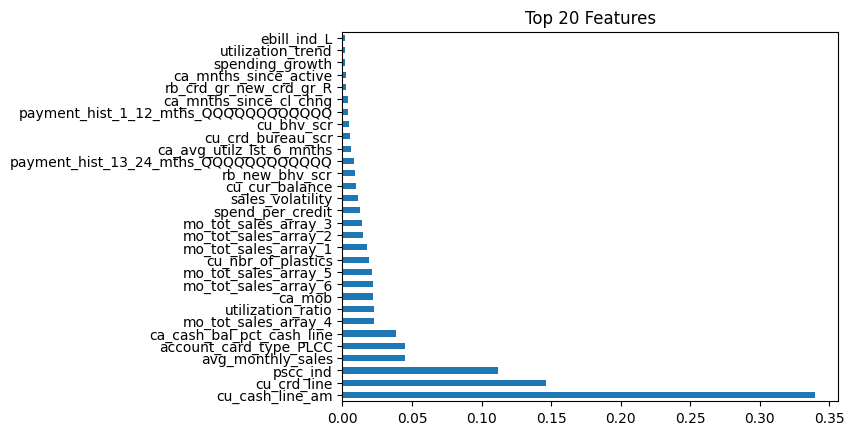

In [20]:
from sklearn.ensemble import RandomForestClassifier

X = X_selected
y = X_selected_with_clusters["Cluster"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(30)
top_features.plot(kind='barh', title="Top 20 Features")


In [21]:
top_important_features = importances.sort_values(ascending=False).head(5).index.tolist()
X_pruned = X_selected[top_important_features]
X_pruned

,cu_cash_line_am,cu_crd_line,pscc_ind,avg_monthly_sales,account_card_type_PLCC
0,2580.0,12900.0,0.0,0.0,0.0
1,2580.0,12900.0,0.0,0.0,0.0
2,2580.0,12900.0,0.0,0.0,0.0
3,2580.0,12900.0,0.0,0.0,0.0
4,2580.0,12900.0,0.0,0.0,0.0
...,...,...,...,...,...
96794,1000000.0,3200.0,0.0,0.0,1.0
96795,1000000.0,3200.0,0.0,0.0,1.0
96796,1000000.0,3200.0,0.0,0.0,1.0
96797,1000000.0,3200.0,0.0,0.0,1.0


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pruned)

X_pruned_with_clusters = X_pruned.copy()
X_pruned_with_clusters["Cluster"] = clusters

joblib.dump(kmeans, "kmeans_model.pkl")

print(pd.Series(clusters).value_counts())
print("Silhouette Score:", silhouette_score(X_pruned, clusters))



d:\sports analytics projects\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    38820
1    33299
0    20168
3     4512
Name: count, dtype: int64
Silhouette Score: 0.7640443893346892


In [23]:
X_pruned

,cu_cash_line_am,cu_crd_line,pscc_ind,avg_monthly_sales,account_card_type_PLCC
0,2580.0,12900.0,0.0,0.0,0.0
1,2580.0,12900.0,0.0,0.0,0.0
2,2580.0,12900.0,0.0,0.0,0.0
3,2580.0,12900.0,0.0,0.0,0.0
4,2580.0,12900.0,0.0,0.0,0.0
...,...,...,...,...,...
96794,1000000.0,3200.0,0.0,0.0,1.0
96795,1000000.0,3200.0,0.0,0.0,1.0
96796,1000000.0,3200.0,0.0,0.0,1.0
96797,1000000.0,3200.0,0.0,0.0,1.0


Cluster                                   0               1            2   
cu_cash_line_am        mean     2237.400089   999999.999820   372.890289  \
                       std      1064.015479        0.013422   442.265777   
                       median   2740.000000  1000000.000000   200.000000   
                       min         0.000000   999999.000000     0.000000   
                       max      3640.000000  1000000.000000  1560.000000   
cu_crd_line            mean    12877.786940     4742.565663  2829.804096   
                       std      2664.468587     3893.953393  2138.836520   
                       median  14000.000000     4000.000000  2300.000000   
                       min      7500.000000      100.000000     0.000000   
                       max     18700.000000    50000.000000  8100.000000   
pscc_ind               mean        0.000000        0.637407     0.012236   
                       std         0.000000        0.480756     0.109939   
                       median      0.000000        1.000000     0.000000   
                       min         0.000000        0.000000     0.000000   
                       max         0.000000        1.000000     1.000000   
avg_monthly_sales      mean     1537.417919      118.250023   112.608989   
                       std      1741.845116      314.162932   310.567997   
                       median    982.504167        0.000000    16.874167   
                       min         0.000000        0.000000     0.000000   
                       max     20545.873333     6870.333333  6758.965000   
account_card_type_PLCC mean        0.149742        0.818974     0.439155   
                       std         0.356827        0.385046     0.496290   
                       median      0.000000        1.000000     0.000000   
                       min         0.000000        0.000000     0.000000   
                       max         1.000000        1.000000     1.000000   

Cluster                                   3  
cu_cash_line_am        mean     4580.229610  
                       std       833.503220  
                       median   5000.000000  
                       min         0.000000  
                       max      8000.000000  
cu_crd_line            mean    23396.923537  
                       std      2963.727824  
                       median  25000.000000  
                       min     17500.000000  
                       max     40037.000000  
pscc_ind               mean        0.000000  
                       std         0.000000  
                       median      0.000000  
                       min         0.000000  
                       max         0.000000  
avg_monthly_sales      mean     3255.620948  
                       std      2790.225621  
                       median   2744.834167  
                       min         0.000000  
                       max     29842.050000  
account_card_type_PLCC mean        0.015957  
                       std         0.125325  
                       median      0.000000  
                       min         0.000000  
                       max         1.000000

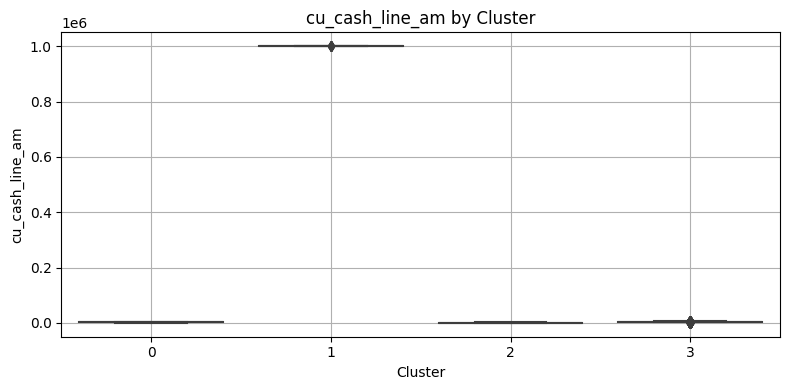

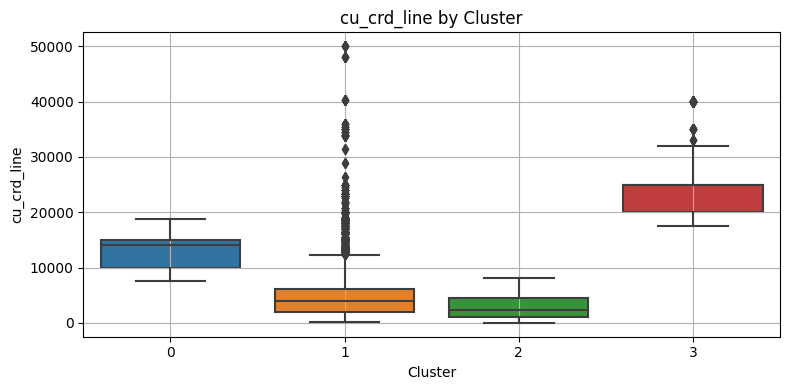

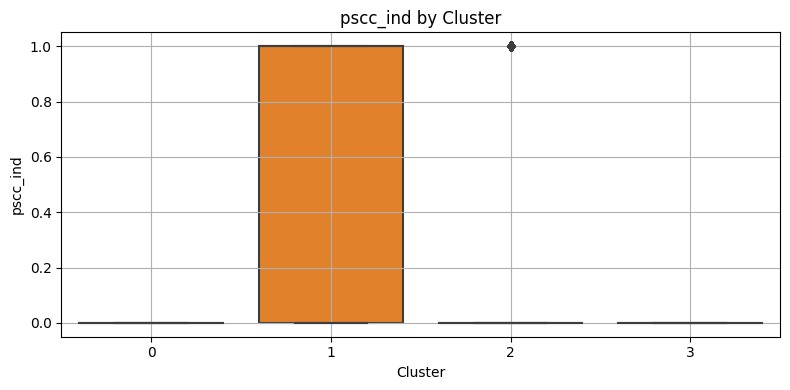

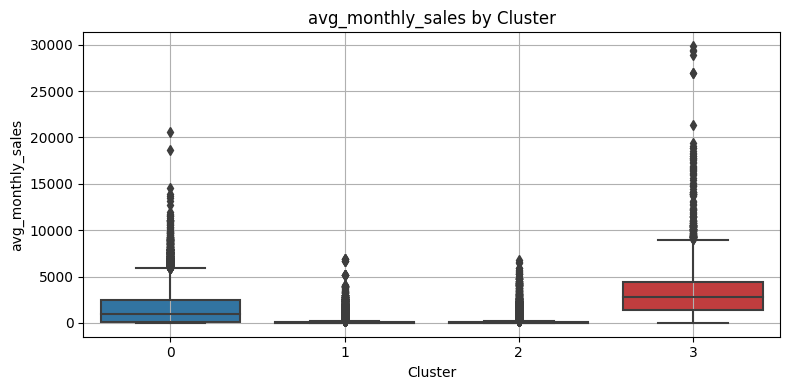

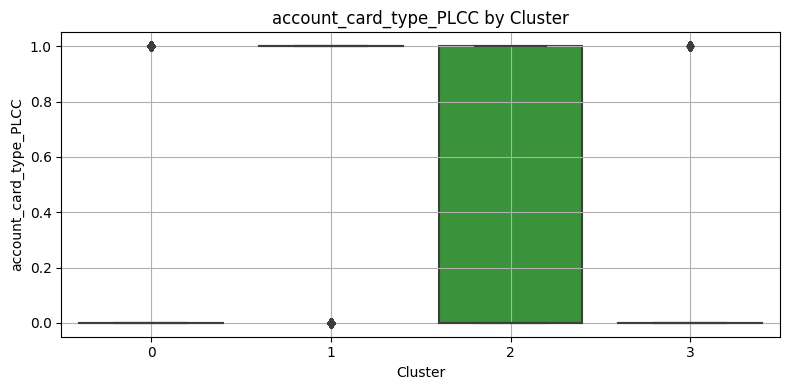


Cluster 0 sample:


,cu_cash_line_am,cu_crd_line,pscc_ind,avg_monthly_sales,account_card_type_PLCC,Cluster
54848,3000.0,15000.0,0.0,64.106667,0.0,0
54893,3000.0,15000.0,0.0,1907.336667,0.0,0
20058,3000.0,15000.0,0.0,1633.880000,0.0,0



Cluster 1 sample:


,cu_cash_line_am,cu_crd_line,pscc_ind,avg_monthly_sales,account_card_type_PLCC,Cluster
80910,1000000.0,4400.0,1.0,0.000000,1.0,1
75424,1000000.0,14300.0,1.0,0.000000,1.0,1
24755,1000000.0,750.0,0.0,82.308333,1.0,1



Cluster 2 sample:


,cu_cash_line_am,cu_crd_line,pscc_ind,avg_monthly_sales,account_card_type_PLCC,Cluster
12056,0.0,300.0,0.0,0.000000,1.0,2
17411,1540.0,7700.0,0.0,643.128333,0.0,2
4003,400.0,2000.0,0.0,57.513333,0.0,2



Cluster 3 sample:


,cu_cash_line_am,cu_crd_line,pscc_ind,avg_monthly_sales,account_card_type_PLCC,Cluster
55020,5000.0,25000.0,0.0,8737.855000,0.0,3
19936,5000.0,25000.0,0.0,654.878333,0.0,3
18576,5000.0,25000.0,0.0,1175.905000,0.0,3


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_labeled = X_pruned.copy()
X_labeled['Cluster'] = clusters

cluster_summary = X_labeled.groupby("Cluster").agg(['mean', 'std', 'median', 'min', 'max'])

cluster_summary_T = cluster_summary.transpose()

pd.set_option("display.max_rows", 200)
display(cluster_summary_T)

for col in X_pruned.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=X_labeled, x="Cluster", y=col)
    plt.title(f"{col} by Cluster")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for c in sorted(X_labeled['Cluster'].unique()):
    print(f"\nCluster {c} sample:")
    display(X_labeled[X_labeled['Cluster'] == c].sample(3, random_state=42))


In [25]:
cluster_map = {
    0: "Low-tier PLCC Users",
    1: "Maxed-Out Cash Line Holders (PLCC)",
    2: "Growing Traditional Customers",
    3: "Top Spenders (Non-PLCC)"
}


Cluster 0: “Low-tier PLCC Users”

Low cash line (~390)

Low credit line (~2.9K)

Moderate spending (~100)

High PLCC ratio

Very low pscc_ind

Interpretation:
"No Credit Line Increase Needed" – They don’t have high enough activity to warrant an increase.



Cluster 1: “Maxed-Out Cash Line Holders (PLCC)”

Cash line exactly 1,000,000 for all

Credit line still low (~4.7K)

Spending is low (~118)

pscc_ind = 1

PLCC-heavy

Interpretation:
"Non-Performing / High Risk"
Extremely uniform (odd data profile). These could be outliers, risky legacy accounts, or fraud signals.



Cluster 2: “Growing Traditional Customers”

Medium credit line (~13K)

Decent spending (~1K/month)

Low pscc_ind and PLCC

Interpretation:
"Credit Line Increase – Risky"
Behavior looks promising but still building. Need more checks (like credit utilization or behavior score). Could offer limited increase with caution.



Cluster 3: “Top Spenders (Non-PLCC)”

Highest credit line (~20K)

High spending (~4K/month)

No PLCC

No pscc_ind

Good distribution across features

Interpretation:
"Credit Line Increase – Low Risk"
These are your best customers. Offer strong credit line increases.

In [26]:
from sklearn.cluster import KMeans
import joblib

# Load the trained KMeans model
kmeans = joblib.load("kmeans_model.pkl")  # Save it earlier using joblib.dump(kmeans, "kmeans_model.pkl")

new_df = pd.read_csv("") # add new data here

# Preprocess your new data (same 5 features, same scaling/clipping)
new_data = new_df[selected_features].copy()
new_data["cu_cash_line_am"] = new_data["cu_cash_line_am"].clip(upper=1_000_000)

# Predict cluster
new_df["Predicted_Cluster"] = kmeans.predict(new_data)


FileNotFoundError: [Errno 2] No such file or directory: ''

In [33]:
X_pruned_with_clusters["Segment_Label"] = X_pruned_with_clusters["Cluster"].map(cluster_map)

merged_with_labels = merged.copy()
merged_with_labels["Cluster"] = X_pruned_with_clusters["Cluster"]
merged_with_labels["Segment_Label"] = X_pruned_with_clusters["Segment_Label"]
labeled_accounts = merged_with_labels[["current_account_nbr", "Cluster", "Segment_Label"]]
labeled_accounts = labeled_accounts.drop_duplicates(subset="current_account_nbr")

labeled_accounts



,current_account_nbr,Cluster,Segment_Label
0,nTgalbpd5Rsol7CA,0,Low-tier PLCC Users
6,xYaLrD9IvmbVl1PB,1,Maxed-Out Cash Line Holders (PLCC)
13,JM78WNziiRWgmL8e,2,Growing Traditional Customers
19,bv4NLVhWTGCf8KgC,2,Growing Traditional Customers
25,nrXceQabYIHo31lp,2,Growing Traditional Customers
...,...,...,...
96773,K8ixzIELRNtw1drn,2,Growing Traditional Customers
96779,CRIi94oT7Dddh2zu,2,Growing Traditional Customers
96785,XiW0as5dJX6GJRi0,1,Maxed-Out Cash Line Holders (PLCC)
96791,Xu1i4wqn776tFKU6,2,Growing Traditional Customers
